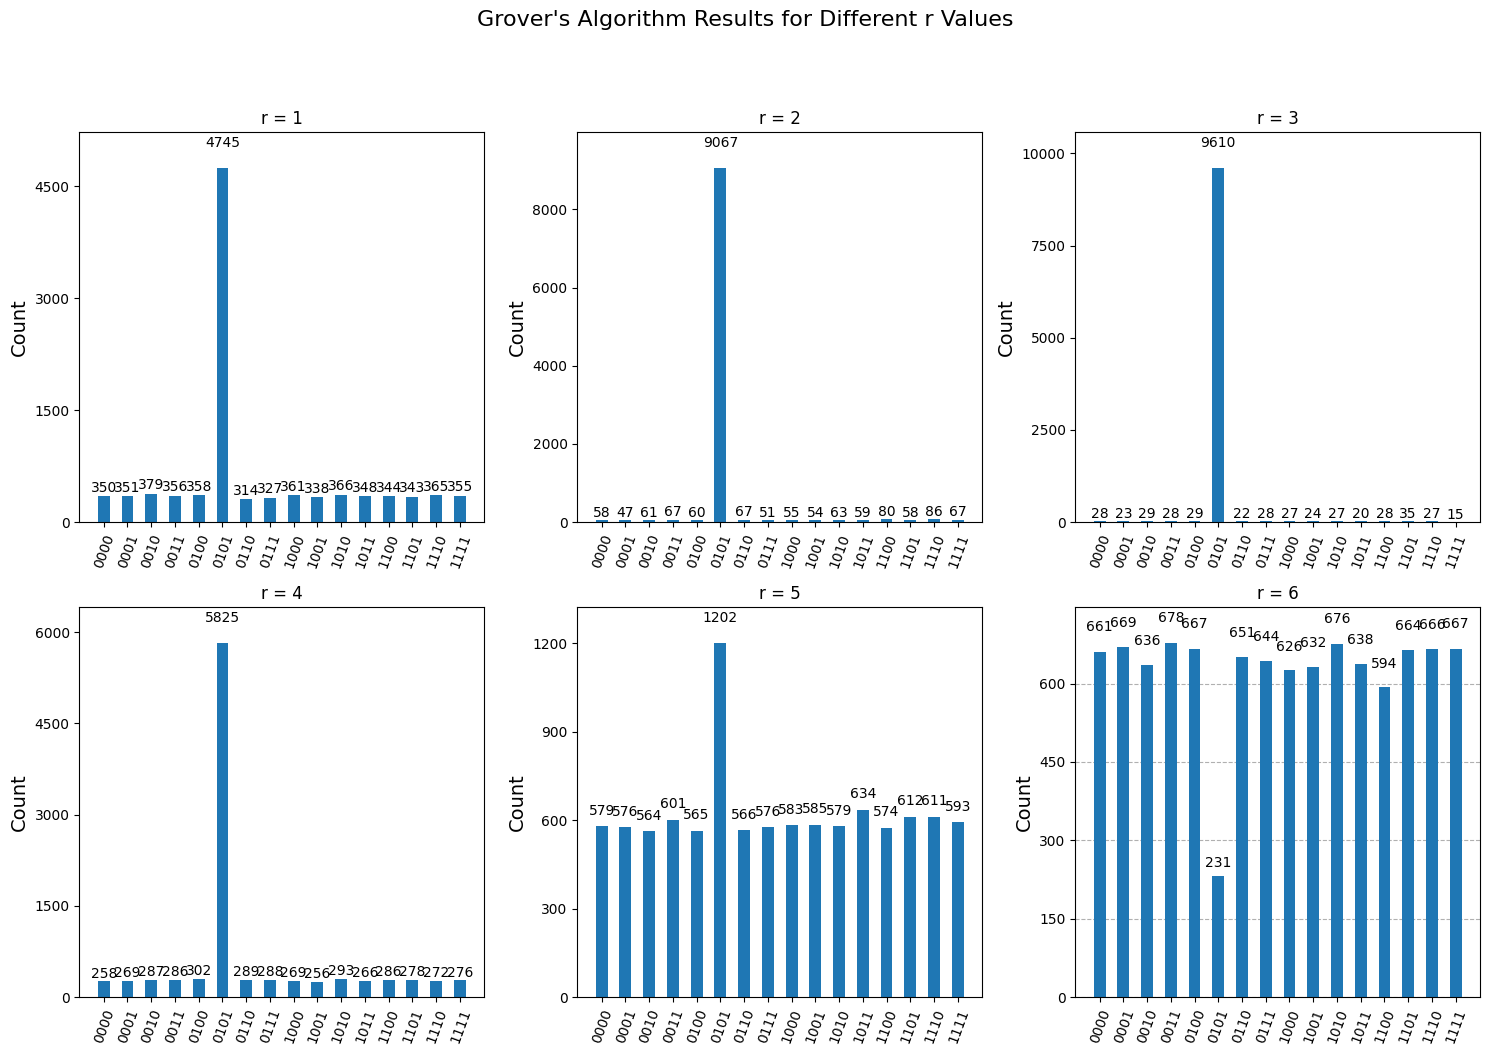

In [ ]:
# (a)
from qiskit import *
from qiskit_aer import QasmSimulator
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import grover_operator, MCMTGate, ZGate
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

# (b)
def create_oracle(marked_state):
    n = len(marked_state)  # Number of qubits
    oracle = QuantumCircuit(n)
    
    for i, bit in enumerate(marked_state):
        if bit == '0':
            oracle.x(i)  # Apply X gate to flip 0 to 1

    # Apply Multi-Controlled Z (MCZ) gate
    oracle.append(MCMTGate(ZGate(), n-1, 1), list(range(n)))

    # Revert the X gates
    for i, bit in enumerate(marked_state):
        if bit == '0':
            oracle.x(i)
    
    return oracle

# (d)
def create_grover_operator(oracle):
    grover_op = grover_operator(oracle)
    return grover_op

# (e)
def create_grover_circuit(r, grover_op):
    n = grover_op.num_qubits
    qc = QuantumCircuit(n, n)

    qc.h(range(n))
    qc.barrier()
    qc.compose(grover_op.power(r), inplace=True)
    qc.barrier
    qc.measure(range(n), range(n))
    
    return qc

# (f)
def run_grover_circuit(marked_state, r):
    oracle = create_oracle(marked_state)
    grover_op = create_grover_operator(oracle)
    grover_circuit = create_grover_circuit(r, grover_op)
    backend = QasmSimulator()
    grover_circuit = transpile(grover_circuit, backend)
    result = backend.run(grover_circuit.reverse_bits(), shots=10000).result()
    counts = result.get_counts()
    return counts

# (g, h)
def experiment(marked_state, r_values):
    countslist = []
    for r in r_values:
        counts = run_grover_circuit(marked_state, r)
        countslist.append(counts)
    return countslist

marked_state = "0101"  # Example 4-bit marked state
N = 2**len(marked_state)
optimal_r = int(np.round(np.pi * np.sqrt(N) / 4))  # Best r = ⌊π√N / 4⌋

r_values = [optimal_r + i for i in range(-2, 4)]
counts_list = experiment(marked_state, r_values)


# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns
axes = axes.flatten()  # Convert the grid into a flat list for easy indexing

# Loop through the counts and plot them in the corresponding subplot
for i, r in enumerate(r_values):
    plot_histogram(counts_list[i], ax=axes[i])  # Assign histogram to the correct subplot
    axes[i].set_title(f"r = {r}")  # Explicitly set subplot title

# Set the overall title for the figure
fig.suptitle("Grover's Algorithm Results for Different r Values", fontsize=16, y=1.05)

# Adjust layout for readability
plt.tight_layout()
plt.show()

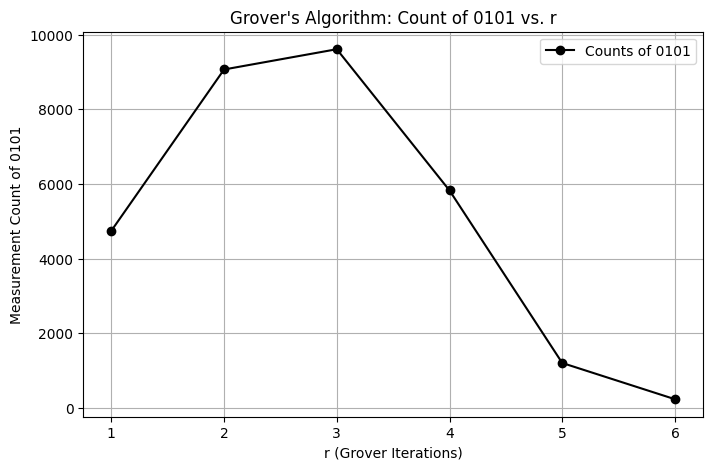

In [95]:
counts_of_interest = [counts.get(marked_state, 0) for counts in counts_list]  # Get count, default to 0 if missing
# Plot the count of "0101" as a function of r
plt.figure(figsize=(8,5))
plt.plot(r_values, counts_of_interest, marker='o', linestyle='-', color='black', label=f'Counts of {marked_state}')
plt.xlabel("r (Grover Iterations)")
plt.ylabel(f"Measurement Count of {marked_state}")
plt.title(f"Grover's Algorithm: Count of {marked_state} vs. r")
plt.legend()
plt.grid(True)
plt.show()